In [1]:
#PyTorch libraries
import torch
import torch.nn as nn
import torch.optim as optim

#Other libraries
import numpy as np
from matplotlib import pyplot as plt

#Custom python files
from model import LSTM_baseline
from training import *
from dataloader import *

In [37]:
input_dim = 32
hidden_dim = 50
batch_size = 20
num_epochs = 100
total_num_games = 7000

LSTM_baseline = TrainingAndEvaluation(input_dim, hidden_dim, num_epochs=num_epochs, model='LSTM_baseline', collate_fn=PadSequence,
                                     batch_size=batch_size, total_num_games=total_num_games,
                                      feature_folder='./data/mixed//features/', label_folder='./data/mixed/labels/')

In [ ]:
results = LSTM_baseline.train()

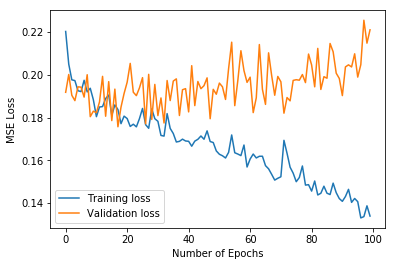

In [23]:
plt.figure(0)
plt.plot(results['train_loss'], label='Training loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [7]:
torch.save(LSTM_baseline.model.model, './model_exp_decay.pt')

In [3]:
LSTM_baseline.model.model = torch.load('./model_exp_decay.pt')

In [25]:
threshold = 0.1
percentage = 0.05
acc = LSTM_baseline.get_accuracy(threshold=threshold, percentage=percentage)

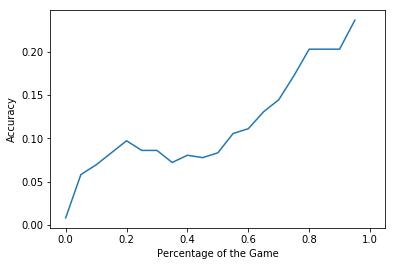

In [26]:
per = np.arange(0,1.0,percentage)
plt.figure(0)
plt.plot(per, acc/20.0)
plt.xlim(-0.05,1.05)
plt.xlabel('Percentage of the Game')
plt.ylabel('Accuracy')
plt.show()

In [33]:
sample_graph = LSTM_baseline.get_single_game_prediction(0)

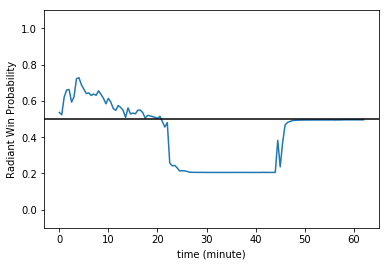

In [34]:
time_stamp = 0.5*np.arange(len(sample_graph.numpy().squeeze()))

plt.figure(1)
plt.plot(time_stamp, sample_graph.numpy().squeeze())
plt.axhline(0.5, color='k', linestyle='-')
plt.ylim(-0.1,1.1)
plt.xlabel('time (minute)')
plt.ylabel('Radiant Win Probability')
plt.show()